<a href="https://colab.research.google.com/github/Daniel-Pereira3264/Machine-Learning-using-Python-Edge-Training/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Needed Packges


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Downloading Data

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-05-11 08:27:57--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.02s   

2024-05-11 08:27:57 (2.77 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



Reading Data

In [ ]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Data Exploration

In [ ]:
# summarize the data
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Lets select some features to explore more.

we can plot each of these features:

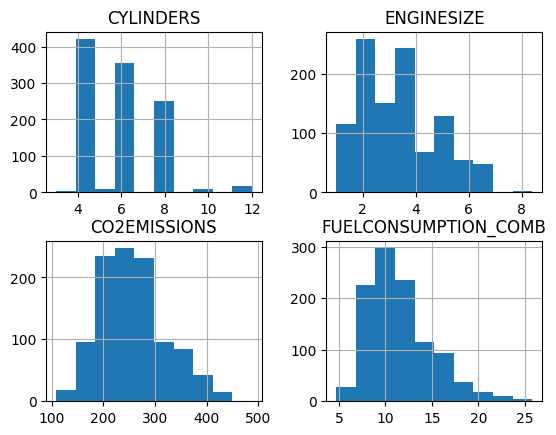

In [ ]:
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

Now, lets plot each of these features vs the Emission, to see how linear is their relation:

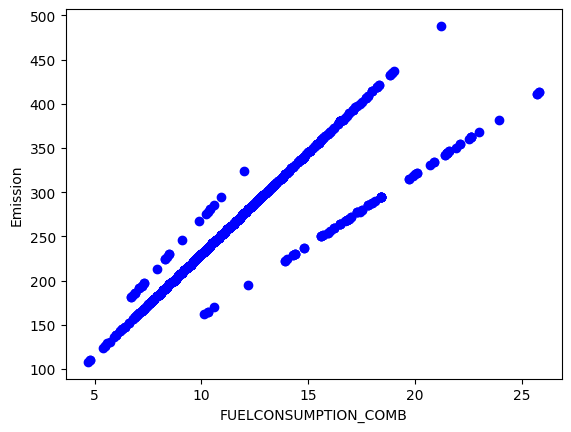

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

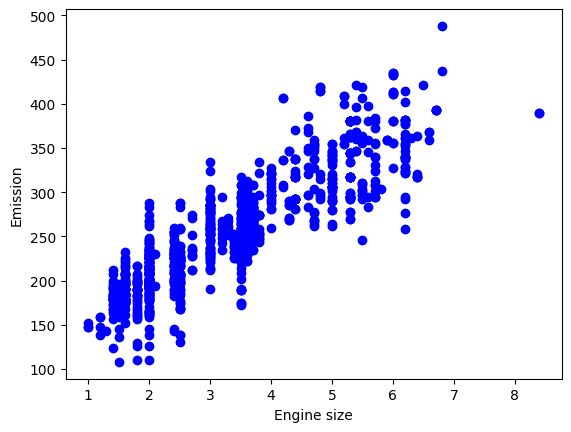

In [ ]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#Practice

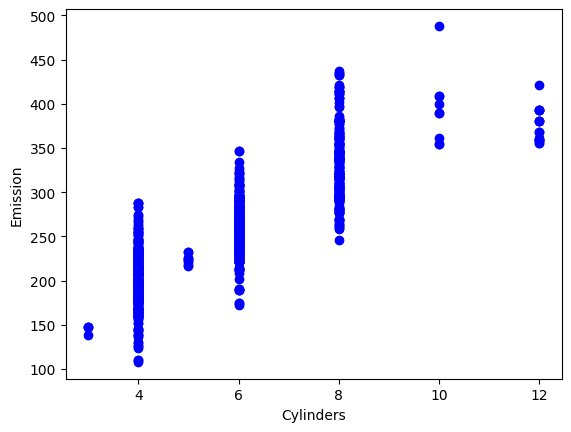

In [ ]:
# write your code here
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.show()

#Creating train and test dataset

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(len(test))

217


#Modeling
Using sklearn package to model data.

In [ ]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.09289798]]
Intercept:  [125.86855457]


Plot outputsf

Text(0, 0.5, 'Emission')

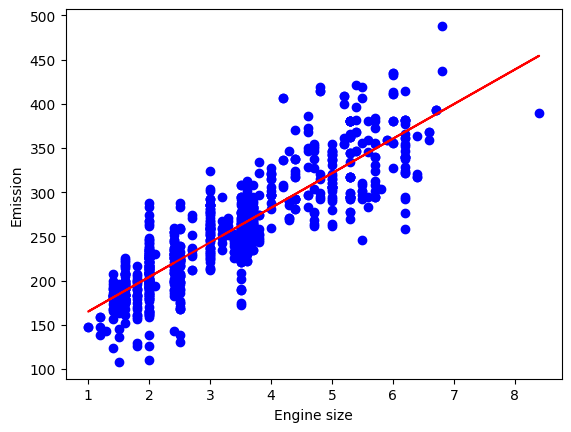

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

#Evaluation
we compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics provide a key role in the development of a model, as it provides insight to areas that require improvement.

There are different model evaluation metrics, lets use MSE here to calculate the accuracy of our model based on the test set:

Mean absolute error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just average error.
Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.
Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error.
R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_hat = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , test_y) )

Mean absolute error: 23.12
Residual sum of squares (MSE): 919.16
R2-score: 0.70


================================================================================

#Simple Linear regression with evaluation metrics

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Exercise: predict the Co2 emission on the FuelConsumption dataset

In [ ]:
# do coding here
df=pd.read_csv('/content/FuelConsumption.csv')
df.head(2)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [ ]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [ ]:
X=df[['FUELCONSUMPTION_COMB_MPG']]
Y=df['CO2EMISSIONS']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Create linear regression model
model_linear = LinearRegression()

# Train the model using the training sets
model_linear.fit(X_train, y_train)

# testing the model
y_predict=model_linear.predict(X_test)

# Calculate MAE
mae_linear = mean_absolute_error(y_test, y_predict)
print("Mean Absolute Error (MAE):", mae_linear)

Mean Absolute Error (MAE): 17.73061220485377


#Multiple Linear Regression

In [ ]:
import pandas as pd
import numpy as np

# Generate synthetic data
np.random.seed(0)
num_samples = 100
years_of_experience = np.random.randint(1, 20, size=num_samples)
age = np.random.randint(22, 65, size=num_samples)
education_level = np.random.randint(1, 5, size=num_samples)  # Assume 1=High School, 2=Bachelor's, 3=Master's, 4=PhD
salary = 30000 + (years_of_experience * 2000) + (age * 100) + (education_level * 5000) + np.random.normal(scale=10000, size=num_samples)

# Create DataFrame
data = {
    "Years of Experience": years_of_experience,
    "Age": age,
    "Education Level": education_level,
    "Salary": salary
}
dataset = pd.DataFrame(data)

print(dataset.head())


   Years of Experience  Age  Education Level        Salary
0                   13   45                4  82454.993353
1                   16   24                2  69683.956665
2                    1   56                4  75723.546515
3                    4   57                2  30758.625212
4                    4   52                4  69712.093458


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming you have loaded your dataset into a pandas DataFrame named 'dataset'
# Splitting the dataset into features (X) and target variable (y)
X = dataset[['Years of Experience', 'Age', 'Education Level']]  # Independent variables
y = dataset['Salary']  # Dependent variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MLR model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 70165147.63207227


======================================================================================


In [ ]:
import pandas as pd

# Assuming df is your dataframe with features and target
df = pd.read_csv('/content/FuelConsumption.csv')
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [ ]:
import pandas as pd

# Assuming df is your dataframe with features and target
# df = pd.read_csv('your_data.csv')

# Exclude object type columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Compute the correlation matrix
corr_matrix = df[numerical_columns].corr()

# Assuming 'target' is the name of your target variable column
# Selecting features highly correlated with the target

target_correlation = corr_matrix['CO2EMISSIONS'].abs().sort_values(ascending=False)

selected_features = target_correlation[target_correlation > 0.5].index.tolist()

# Selecting highly correlated features (optional)
# You might want to remove highly correlated features among themselves to reduce redundancy
# Here, we'll set a threshold of 0.7 for demonstration purposes
highly_correlated_features = set()

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            colname = corr_matrix.columns[i]
            highly_correlated_features.add(colname)

# Remove highly correlated features from selected features
selected_features = [feature for feature in selected_features if feature not in highly_correlated_features]

# Print selected features
print("Selected Features:", selected_features)


Selected Features: ['ENGINESIZE']


In [ ]:
# method 2
# Select numerical columns excluding the target column 'CO2EMISSIONS'
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix between features and target
corr_matrix = df[numerical_columns].corrwith(df['CO2EMISSIONS'])

# Filter features with correlation coefficients greater than 0.5
high_corr_features = corr_matrix[corr_matrix.abs() > 0.5].index.tolist()

# Print high correlation features
print(high_corr_features)





ValueError: Boolean array expected for the condition, not int64

#Chi Squre

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Sample data (replace with your own data)
X = pd.DataFrame({
    'Feature1': [1, 1, 0, 1, 0],
    'Feature2': ['A', 'B', 'A', 'B', 'A'],
    'Feature3': [1, 0, 1, 0, 1],
})

y = pd.Series([1, 0, 1, 0, 1])

# Create a contingency table between each feature and the target variable
for feature in X.columns:
    contingency_table = pd.crosstab(X[feature], y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square value for {feature}: {chi2}")


Chi-square value for Feature1: 0.31250000000000006
Chi-square value for Feature2: 1.7013888888888886
Chi-square value for Feature3: 1.7013888888888886


In [ ]:
import numpy as np
from scipy.stats import chi2_contingency

# Example data (replace this with your own data)
observed_data = np.array([[20, 30, 40], [10, 25, 35]])

# Initialize a list to store chi-square values for each feature
chi_square_values = []

# Compute chi-square statistic for each feature
for feature_data in observed_data:
    chi2, _, _, _ = chi2_contingency([feature_data])
    chi_square_values.append(chi2)

# Create a list of feature indices sorted by chi-square values (higher values first)
sorted_indices = np.argsort(chi_square_values)[::-1]

# Rank features based on chi-square values
ranked_features = [(index, chi_square_values[index]) for index in sorted_indices]

# Print the ranked features
print("Ranked features based on chi-square values:")
for rank, (feature_index, chi_square) in enumerate(ranked_features, start=1):
    print(f"Rank {rank}: Feature {feature_index + 1} (Chi-square: {chi_square:.2f})")


Ranked features based on chi-square values:
Rank 1: Feature 2 (Chi-square: 0.00)
Rank 2: Feature 1 (Chi-square: 0.00)


In [ ]:
x=df.select_dtypes(include=['float64', 'int64'])
X=x.drop('MODELYEAR', axis=1)
X

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [ ]:
# chi-square feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
from numpy import array

y=X['CO2EMISSIONS'] # target column
x=X.drop('CO2EMISSIONS', axis=1)

select = SelectKBest(score_func=chi2, k=3)

z = select.fit_transform(x,y)

filter = select.get_support()

feat_labels=x.columns

features = array(feat_labels)
print("All features:")
print(features)

print("Selected best 3:")
print(features[filter])


#for i in range(len(select.scores_)):
#	print('Feature %d: %f' % (i, select.scores_[i]))


All features:
['ENGINESIZE' 'CYLINDERS' 'FUELCONSUMPTION_CITY' 'FUELCONSUMPTION_HWY'
 'FUELCONSUMPTION_COMB' 'FUELCONSUMPTION_COMB_MPG']
Selected best 3:
['FUELCONSUMPTION_CITY' 'FUELCONSUMPTION_COMB' 'FUELCONSUMPTION_COMB_MPG']


In [ ]:
filter

array([False, False,  True, False,  True,  True])

In [ ]:
x=df.select_dtypes(include=['float64', 'int64'])
X=x.drop('MODELYEAR', axis=1)
X

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...
1062,3.0,6,13.4,9.8,11.8,24,271
1063,3.2,6,13.2,9.5,11.5,25,264
1064,3.0,6,13.4,9.8,11.8,24,271
1065,3.2,6,12.9,9.3,11.3,25,260


In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Sample data (replace with your own data)

y = X['CO2EMISSIONS'] # target column

X=X.drop('CO2EMISSIONS', axis=1)




# Create a contingency table between each feature and the target variable
for feature in X.columns:
    contingency_table = pd.crosstab(X[feature], y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square value for {feature}: {chi2}")


Chi-square value for ENGINESIZE: 17239.7120131964
Chi-square value for CYLINDERS: 3795.312717687078
Chi-square value for FUELCONSUMPTION_CITY: 67468.01331387098
Chi-square value for FUELCONSUMPTION_HWY: 45930.576699797144
Chi-square value for FUELCONSUMPTION_COMB: 137369.680005069
Chi-square value for FUELCONSUMPTION_COMB_MPG: 41085.271386961016
